To generate a presentation run the following command:

``jupyter nbconvert Lecture_4.ipynb --to slides --post serve``

# How to use this notebook

This notebook serves as both a presentation and interactive environment for students to experiment with Python. If you run it in the interactive mode using [Binder](https://mybinder.org/v2/gh/krzysztofarendt/deap/master), you can modify all code cells. Press `Shift+Enter` to run the modified code.

Link to the repository: https://github.com/krzysztofarendt/deap 

# Lecture outline

1. Reading and writing files with Python
2. Introduction to `pandas`

# Reading and writing files with Python

Programs that can process data stored in text file are often very useful. The most generic (= usually not the easiest/fastest) way to work with text file is by using the function `open(filename, mode)`:

In [1]:
f = open("examples/io/my_file.txt", "w")

f.write("Any text can be sent to the file...\n")
f.write("And more than one line!\n")
f.write("Remember to close the file when you're finished!")

f.close()

The are four modes in which you can open a file:
- 'r' - read mode,
- 'w' - write mode,
- 'a' - append mode,
- 'r+' - read and write mode.

If you open a file in the *read* mode, you can only read its content:

In [2]:
f = open("examples/io/my_file.txt", "r")
content = f.readlines()
f.close()

print(content)

['Any text can be sent to the file...\n', 'And more than one line!\n', "Remember to close the file when you're finished!"]


Can you guess the data type returned by `f.readlines()`?

You can iterate over the lines and process them separately:

In [3]:
for line in content:
    print(line)

Any text can be sent to the file...

And more than one line!

Remember to close the file when you're finished!


In the previous example we printed strings ending with `\n`. Additional new line characters are added automatically by the `print` statement itself. To remove `\n` from a string you can you use any of the following methods:

In [4]:
for line in content:
    print(line.strip())  # strip() removes any trailing spaces and new lines

Any text can be sent to the file...
And more than one line!
Remember to close the file when you're finished!


In [5]:
for line in content:
    print(line.replace('\n', ''))  # replace() replaces specific characters or substrings

Any text can be sent to the file...
And more than one line!
Remember to close the file when you're finished!


In [6]:
# Count number of exclamation marks in the text
n = 0
for line in content:
    for character in line:
        if character == '!':
            n += 1  # The same as n = n + 1

print('The are {} exclamation marks in the text.'.format(n))

The are 2 exclamation marks in the text.


There are other functions for reading the files, but `readlines()` is probably the most straighforward.

The other functions are:
- `f.read()` - read entire file as one string
- `f.readline()` - read one line and proceed to the next one

Try them yourself on the file "my_file.txt".

Each time you open a file in a *write* mode ('w'), its content is deleted and replaced with the new content. That's why there's is also the *append* mode, in which you can only add new content to the end of the file.

In [7]:
f = open("examples/io/my_file.txt", "a")
f.write('\n')
f.write("This line was added in the append ('a') mode.")
f.close()

Just like you can read multiple lines at once with `f.readlines()`, you can write multiple lines with `f.writelines()`:

In [8]:
lines = ['Line 1\n', 'Line 2\n', 'Line 3\n']
f = open("examples/io/my_file2.txt", "w")
f.writelines(lines)
f.close()

Sometimes you want to both read and write to some file. There is a special mode 'r+' for this, however the same effect can be achieved using 'r' and 'w' separately, and this is what is advised to you for now :)

Finally, often the text stored in files is separated with commas, semicolons, or tabs. It's easy to split such text into separate strings.

By the way, a tab is represented in Python with `\t`.

In [9]:
txt1 = "var1,var2,var3"
txt2 = "var1;var2;var3"
txt3 = "var1\tvar2\tvar3"
print(txt1)
print(txt2)
print(txt3)

var1,var2,var3
var1;var2;var3
var1	var2	var3


In [10]:
print(txt1.split(','))
print(txt2.split(';'))
print(txt3.split('\t'))

['var1', 'var2', 'var3']
['var1', 'var2', 'var3']
['var1', 'var2', 'var3']


Voila! You get a list of strings.

### Exercise 1

Some programs cannot read non-ASCII characters, like æ, å, ø, Æ, Å, Ø. To avoid ugly printing and other issues it is sometimes useful to replace those characters with ASCII equivalents, e.g.:
- æ, Æ - ae, AE
- å, Å - aa, AA
- ø, Ø - oe, Oe

Tasks:
1. Read the text file `"examples/dk_cities/data/dk_cities.csv"` and replace all the Danish letters with the digraphs suggested above.
2. Then save the file as `"examples/dk_cities/data/dk_cities_ascii.csv"`.

It's best if you do the exercise in an **offline copy in Spyder**. Otherwise your script would be lost when you close the Binder.

# Introduction to Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for working with tabular data. 

**From introduction to pandas documentation:**

*pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.*

To work with pandas first you need to import it:

In [1]:
import pandas as pd

Pandas defines a new data structure called *data frame*. Data frames are used for tabular data:

![https://cdn-images-1.medium.com/max/1600/1*6p6nF4_5XpHgcrYRrLYVAw.png](https://cdn-images-1.medium.com/max/1600/1*6p6nF4_5XpHgcrYRrLYVAw.png)

Image source: https://cdn-images-1.medium.com/max/1600/1*6p6nF4_5XpHgcrYRrLYVAw.png

A new data frame can be created manually or read from a file.

Manually:

In [5]:
data = [[1, 2, 3], [4, 5, 6]]
df = pd.DataFrame(data=data)
df

,0,1,2
0,1,2,3
1,4,5,6


Rows and columns can be named using user-defined sequences:

In [6]:
df = pd.DataFrame(data=data, index=['Row 1', 'Row 2'], columns=['A', 'B', 'C'])
df

,A,B,C
Row 1,1,2,3
Row 2,4,5,6


If you're not in a notebook, you should use `print()` to display a data frame:

In [7]:
print(df)

       A  B  C
Row 1  1  2  3
Row 2  4  5  6


### Reading and writing from and to CSV files

CSV files are text files containing data stored as *comma-separated values*. It is one of the most often used file formats for storing **tabular data**.

Reading CSV files is very easy with `pandas`. (If you work off-line, the copy of this CSV can be downloaded from here: [http://bit.ly/2IEi1zY](http://bit.ly/2IEi1zY))

In [8]:
cities = pd.read_csv('examples/dk_cities/data/dk_cities.csv')

The content of the CSV file is now stored in a *data frame* (special data structure). There are many methods that you can use with data frames, e.g. to see the *head* of the data frame:

In [9]:
cities.head()  # print(cities.head()) if you're not in a Jupyter Notebook

,No.,City,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,Unnamed: 14
0,1,Copenhagen,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885,NaN
1,2,Aarhus,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674,NaN
2,3,Odense,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060,NaN
3,4,Aalborg,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617,NaN
4,5,Esbjerg,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886,NaN


You can see, that there is a strange column at the end, `'Unnamed: 14'`, which is here because the CSV file you read has a slightly incorrect format. Each line ends with a comma, whereas it should end with just a new line character.

Let's deal with this problems using two different approaches.

First, let's "manually" remove the trailing commas. Analyze the following code:

In [10]:
# Approach 1: Remove trailing commas manually

# Read the file content
f = open('examples/dk_cities/data/dk_cities.csv', 'r')
original_lines = f.readlines()
f.close()

# Initialize empty list
new_lines = []

# For each line do the following:
#    1. Remove the trailing \n with .strip()
#    2. Take all characters except the last one (the trailing comma)
#    3. Add new \n
#    4. Add the corrected line to the new lines
for line in original_lines:
    new_lines.append(line.strip()[:-1] + '\n')  # Steps 1-4 done in a single line

f = open('examples/dk_cities/data/dk_cities_fixed.csv', 'w')
f.writelines(new_lines)
f.close()

Let's check that the new CSV is correctly read by pandas:

In [11]:
cities = pd.read_csv('examples/dk_cities/data/dk_cities_fixed.csv')

cities.head()

,No.,City,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,1,Copenhagen,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885
1,2,Aarhus,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
2,3,Odense,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060
3,4,Aalborg,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617
4,5,Esbjerg,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886


In [12]:
# Approach 2: Using pandas
cities = pd.read_csv('examples/dk_cities/data/dk_cities.csv')  # Re-read the original file

cities.head()

,No.,City,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,Unnamed: 14
0,1,Copenhagen,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885,NaN
1,2,Aarhus,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674,NaN
2,3,Odense,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060,NaN
3,4,Aalborg,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617,NaN
4,5,Esbjerg,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886,NaN


In [13]:
cities = cities.drop('Unnamed: 14', axis=1)
cities.head()

,No.,City,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,1,Copenhagen,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885
1,2,Aarhus,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
2,3,Odense,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060
3,4,Aalborg,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617
4,5,Esbjerg,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886


In [14]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index, columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivalent to ``columns=labels``).
    
        .. versionadded:: 0.21.0
    level : int or level name, optional
        For MultiIndex, level from which the labels will be removed.

### Visualization methods

You'll learn more visualization methods later, but for now let's at least mention that you can visualize the content of any data frame containing numeric data:

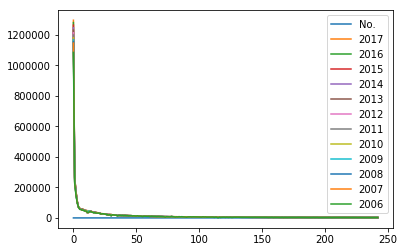

In [21]:
cities.plot()

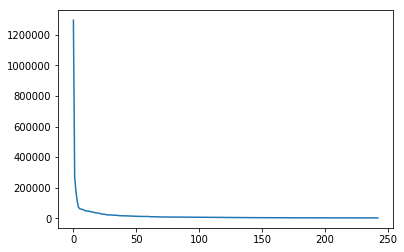

In [22]:
cities['2017'].plot()

These plots were not very informative. Some more steps are often needed to get the desired insight:

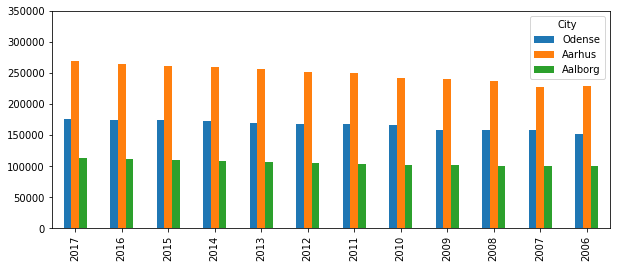

In [36]:
cities.drop('No.', axis=1)\
    .set_index('City')\
    .loc[['Odense', 'Aarhus', 'Aalborg']].T\
    .plot(kind='bar', ylim=(0, 350000), figsize=(10, 4));

...WAIT, what just happened?

### Manipulation of data frames

A data frame has an index identifying its rows, and a header identifying its columns. When you read a data frame a default index is automatically added, which simply numbers the rows (starting from 0). You can specify a new index with `.set_index()`:

In [18]:
cities = cities.set_index('No.')
cities.head()

,City,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
No.,,,,,,,,,,,,,
1,Copenhagen,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885
2,Aarhus,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
3,Odense,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060
4,Aalborg,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617
5,Esbjerg,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886


You can always reset the index, in which case the index will appear as one of the variables again:

In [19]:
cities = cities.reset_index()
cities.head()

,No.,City,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,1,Copenhagen,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885
1,2,Aarhus,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
2,3,Odense,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060
3,4,Aalborg,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617
4,5,Esbjerg,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886


Let's try use the variable `City` as the index:

In [20]:
cities = cities.set_index('City')
cities.head()

,No.,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
City,,,,,,,,,,,,,
Copenhagen,1,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885
Aarhus,2,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
Odense,3,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060
Aalborg,4,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617
Esbjerg,5,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886


In [21]:
# Select a specific row by index name
cities.loc['Odense']

No.          3
2017    176683
2016    175245
2015    173814
2014    172512
2013    170327
2012    168798
2011    167615
2010    166305
2009    158678
2008    158163
2007    158453
2006    152060
Name: Odense, dtype: int64

In [22]:
# Select a specific variable
cities['2017']

City
Copenhagen            1295686
Aarhus                 269022
Odense                 176683
Aalborg                113417
Esbjerg                 72261
Randers                 62563
Kolding                 60300
Horsens                 58480
Vejle                   55876
Roskilde                50393
Herning                 49229
Hørsholm                47294
Helsingør               47123
Silkeborg               44333
Næstved                 43234
Fredericia              40461
Viborg                  40371
Køge                    36864
Holstebro               35867
Taastrup                34154
Slagelse                33433
Hillerød                32278
Holbæk                  28134
Sønderborg              27826
Svendborg               27281
Hjørring                25764
Frederikshavn           23501
Nørresundby             22600
Ringsted                22490
Haderslev               21955
                       ...   
Højslev Stationsby       2820
Vestbjerg                2810
Tingl

In [23]:
# Select a range of rows
cities.loc['Copenhagen':'Odense']

,No.,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
City,,,,,,,,,,,,,
Copenhagen,1,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885
Aarhus,2,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
Odense,3,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060


In [24]:
# Select a subset of variables
cities[['2017', '2007']]

,2017,2007
City,,
Copenhagen,1295686,1145804
Aarhus,269022,228123
Odense,176683,158453
Aalborg,113417,100731
Esbjerg,72261,71129
Randers,62563,59391
Kolding,60300,55407
Horsens,58480,51112
Vejle,55876,49943


In [25]:
# Combining both
cities.loc[['Copenhagen', 'Odense']][['2017', '2016']]

,2017,2016
City,,
Copenhagen,1295686,1280371
Odense,176683,175245


In [26]:
# Using only loc selecting both rows and columns
cities.loc[['Copenhagen', 'Odense'], ['2017', '2016']]

,2017,2016
City,,
Copenhagen,1295686,1280371
Odense,176683,175245


In [27]:
# Getting a single "cell"
cities.loc['Odense', '2015']

173814

In [28]:
# Drop row
cities.drop('Copenhagen').head()

,No.,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
City,,,,,,,,,,,,,
Aarhus,2,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
Odense,3,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060
Aalborg,4,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617
Esbjerg,5,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886
Randers,6,62563,62342,61664,61163,60895,61121,60656,60227,59842,59565,59391,55909


In [29]:
# Drop column
cities.drop('No.', axis=1).head()

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
City,,,,,,,,,,,,
Copenhagen,1295686,1280371,1263698,1246611,1230728,1213822,1199224,1181239,1167569,1153615,1145804,1084885
Aarhus,269022,264716,261570,259754,256018,252213,249709,242914,239865,237551,228123,228674
Odense,176683,175245,173814,172512,170327,168798,167615,166305,158678,158163,158453,152060
Aalborg,113417,112194,110495,109092,106916,104855,103545,102312,101497,100873,100731,100617
Esbjerg,72261,72151,72060,71618,71491,71579,71576,71459,71025,70880,71129,71886


In [39]:
# Getting a particular row number
cities.iloc[3]

No.          4
2017    113417
2016    112194
2015    110495
2014    109092
2013    106916
2012    104855
2011    103545
2010    102312
2009    101497
2008    100873
2007    100731
2006    100617
Name: Aalborg, dtype: int64

### Basic arithmetic and statistical operations

Let's calculate the total population for each year:

In [30]:
# Let's work on a copy without 'No.'
df = cities.drop('No.', axis=1)
df.sum()

2017    4219620
2016    4179092
2015    4133116
2014    4096880
2013    4065457
2012    4032811
2011    4003834
2010    3962470
2009    3902680
2008    3858294
2007    3826891
2006    3733983
dtype: int64

Some statistical summary:

In [31]:
df.describe()

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
count,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02,2.430000e+02
mean,1.736469e+04,1.719791e+04,1.700871e+04,1.685959e+04,1.673028e+04,1.659593e+04,1.647668e+04,1.630646e+04,1.606041e+04,1.587775e+04,1.574852e+04,1.536619e+04
std,8.578832e+04,8.476814e+04,8.367356e+04,8.257319e+04,8.151614e+04,8.040404e+04,7.945202e+04,7.824266e+04,7.728206e+04,7.636908e+04,7.578048e+04,7.199244e+04
min,2.490000e+03,2.486000e+03,2.395000e+03,2.371000e+03,2.359000e+03,2.340000e+03,2.288000e+03,2.283000e+03,2.032000e+03,2.049000e+03,2.061000e+03,5.310000e+02
25%,3.235500e+03,3.220000e+03,3.223000e+03,3.237500e+03,3.187000e+03,3.184000e+03,3.178500e+03,3.172500e+03,3.140000e+03,3.114000e+03,3.075500e+03,2.993500e+03
50%,4.905000e+03,4.881000e+03,4.913000e+03,4.883000e+03,4.866000e+03,4.796000e+03,4.701000e+03,4.732000e+03,4.658000e+03,4.632000e+03,4.590000e+03,4.483000e+03
75%,1.109200e+04,1.103400e+04,1.087400e+04,1.085850e+04,1.086650e+04,1.087250e+04,1.083000e+04,1.085350e+04,1.046450e+04,1.041550e+04,1.024400e+04,1.007950e+04
max,1.295686e+06,1.280371e+06,1.263698e+06,1.246611e+06,1.230728e+06,1.213822e+06,1.199224e+06,1.181239e+06,1.167569e+06,1.153615e+06,1.145804e+06,1.084885e+06


In [32]:
df['2017'].max()

1295686

In [33]:
df['2017'].min()

2490

Calculate the increase from 2016 to 2017:

In [34]:
df['2017'] - df['2016']

City
Copenhagen            15315
Aarhus                 4306
Odense                 1438
Aalborg                1223
Esbjerg                 110
Randers                 221
Kolding                 588
Horsens                 963
Vejle                  1014
Roskilde                347
Herning                 698
Hørsholm                294
Helsingør               294
Silkeborg               448
Næstved                 255
Fredericia              213
Viborg                  515
Køge                     33
Holstebro               475
Taastrup                183
Slagelse                433
Hillerød                381
Holbæk                  555
Sønderborg              231
Svendborg               207
Hjørring                138
Frederikshavn            99
Nørresundby             122
Ringsted                259
Haderslev               -39
                      ...  
Højslev Stationsby        8
Vestbjerg                75
Tinglev                  42
Ullerslev                18
Frejlev        

Can you say what's happening here?

In [35]:
(df['2017'] - df['2016']).mean()

166.78189300411523

Let's see the increase only for Copenhagen and Odense:

In [36]:
(df['2017'] - df['2016']).loc[['Copenhagen', 'Odense']]

City
Copenhagen    15315
Odense         1438
dtype: int64

Did any city or town experiences a decrease in the population between 2006-2017?

In [37]:
decreased = df.loc[(df['2017'] - df['2006']) < 0]

decreased

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
City,,,,,,,,,,,,
Frederikshavn,23501,23402,23345,23156,23309,23295,23339,23331,23511,23551,23499,23636
Korsør,14702,14603,14392,14369,14501,14538,14412,14439,14589,14659,14773,14850
Rønne,13723,13639,13579,13568,13730,13887,13904,13924,14031,14056,13990,14043
Nakskov,12758,12688,12665,12866,13243,13332,13560,13697,13886,14013,14051,14240
Struer,10375,10415,10285,10261,10427,10544,10572,10797,10873,10846,10809,10957
Nykøbing M,9135,9012,9014,9031,9040,9222,9154,9172,9198,9189,9136,9225
Hundested,8588,8595,8543,8579,8632,8732,8861,8832,8867,8917,8874,8892
Skagen,8088,8124,8211,8198,8220,8347,8515,8636,8750,8941,9187,9380
Tønder,7693,7587,7543,7595,7572,7685,7690,7743,7787,7831,7792,7896


### Save to CSV

If you want to save your data frame to a csv file just use `pd.to_csv()`:

In [38]:
decreased.to_csv('examples/dk_cities/data/decreased.csv')

### Exercise

On average, what was the population increase/decrease in Danish cities between 2006 and 2017?

Group the results by the city population: 0-10000, 10000-50000, 50000-